In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries
from matplotlib.lines import Line2D # for custom legend
from matplotlib_scalebar.scalebar import ScaleBar
from datetime import datetime # to print timing of cells

# set parameters to save svg
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2
# Set-up variables


In [2]:

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
# out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"
# out_path = home_dir+"/Emily/STP_for_MAPseq/4_python_output/output_figs/"
out_path = "/Users/eisko/Documents/CSHL/Yr4/Manuscript STP_mapseq paper/figures/supp_STP/"


# load metadata
metadata = pd.read_csv("stp_metadata.csv")



# Just look at OMC

In [113]:
# # import all masks
# meta = metadata.copy()
# title = "ALL"

# just import OMC brains
meta = metadata[metadata['inj_site']=="OMC"].reset_index(drop=True)
title="OMC"


In [114]:


start = datetime.now()
# import masks for each brain in order of metadata
# create list of dictionaries containing masks
areas = ["grey", "CTX", "STR", "CP","BS", "TH", "AMY", "PG", "MB", "PAG", "SCm",
         "PAG", "SNr", "HY", "HIP"]

all_masks = []

for i in range(meta.shape[0]):
    brain = meta.loc[i, "brain"]
    print("\n","working on", brain)
    masks_folder = in_path+"masks/"+brain+"_masks/"

    masks = {}
    for area in areas:
        print("working on", area)
        with open(masks_folder+brain+"_"+area+".npy", "rb") as f:
            masks[area] = np.load(f)

    all_masks.append(masks)

print(datetime.now()-start)

len(all_masks)


 working on OMC_MMus_220119_b0
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on OMC_MMus_220303_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on OMC_MMus_220324_b2
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on OMC_STeg_220208_b0
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working

6

## Draw contours

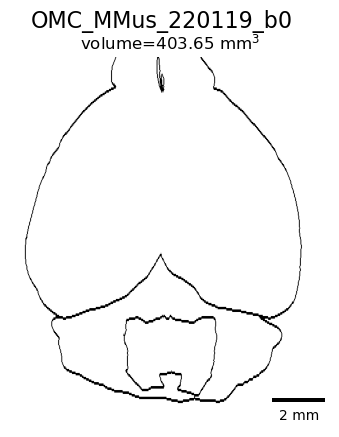

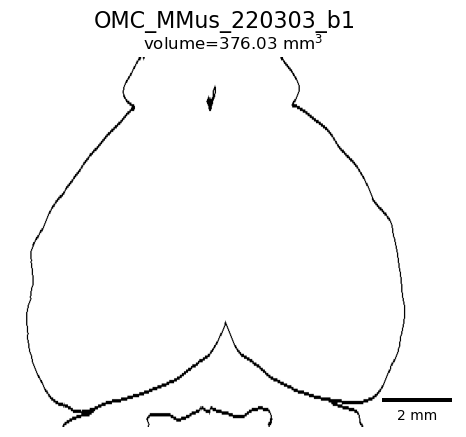

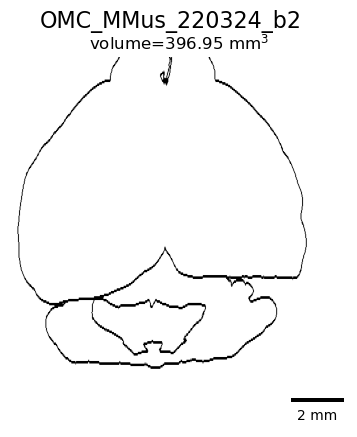

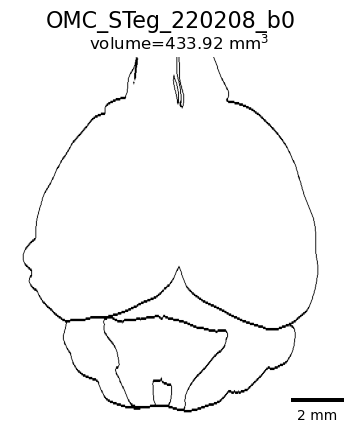

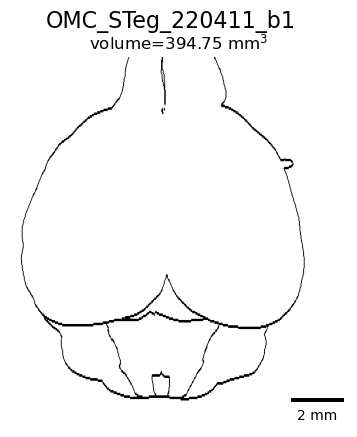

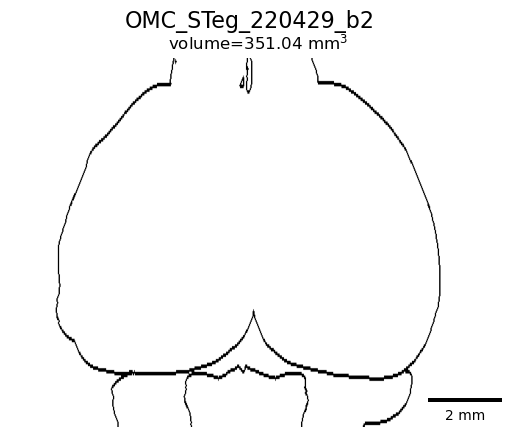

In [30]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# having trouble printing images the same scale without adjustment,
# wider brains have reduced scale, need to readjust in adobe

# create outlines of each brain
for i in range(meta.shape[0]):
    brain = meta.loc[i,'brain']
    mask = all_masks[i]
    grey_sum = mask['grey'].sum()
    volume = grey_sum*voxel_size

    plot_contour(images=None, mask_dict=mask, masks_to_plot=mask_order, view="top")
    plt.suptitle(meta.loc[i,"brain"], size=16)
    plt.title("volume="+str(volume)[:6]+" $\mathregular{mm^3}$")

    # add scalebar
    scalebar = ScaleBar(20, "um", location="lower right")
    ax = plt.gca()
    ax.add_artist(scalebar)
    # plt.gcf().set_dpi(300)
    # plt.savefig(out_path+brain+"_outline.svg", dpi=300, bbox_inches="tight")

    plt.show()

In [31]:
# mask_order = ["grey", "BS", "STR", "CP", "CTX"]
# voxel_size = 0.05*0.02*0.02

# # create outlines of each brain
# i=0
# meta.loc[i,'brain']
# mask = all_masks[i]
# grey_sum = mask['grey'].sum()
# volume = grey_sum*voxel_size

# plot_contour(images=None, mask_dict=mask, masks_to_plot=mask_order, view="top",
#              fig_size=(6,6))
# plt.suptitle(meta.loc[i,"brain"], size=16)
# plt.title("volume="+str(volume)[:6]+"mm^3")

# # add scalebar
# scalebar = ScaleBar(20, "um", location="lower right")
# ax = plt.gca()
# ax.add_artist(scalebar)


# # plt.savefig(out_path+brain+"_outline.jpg", dpi=300, bbox_inches="tight")

# plt.show()

In [17]:
for i in range(meta.shape[0]):
    print(all_masks[i]['grey'].shape)

(265, 499, 640)
(265, 499, 640)
(226, 499, 640)
(270, 499, 640)
(270, 499, 640)
(265, 499, 640)
(280, 464, 605)
(212, 499, 640)
(280, 499, 640)
(280, 499, 640)
(280, 499, 640)
(201, 499, 675)


In [100]:
# voxel_size = 0.05*0.02*0.02

# # create outlines of each brain
# for i in range(meta.shape[0]):
#     meta.loc[i,'brain']
#     mask = all_masks[i]
#     grey_sum = mask['grey'].sum()
#     volume = grey_sum*voxel_size
#     meta.loc[i,'volume'] = volume

# dot_plot_by_species(meta, to_plot="volume", ylabel="Volume $\mathregular{mm^3}$")
# plt.ylim(0,500)
# plt.title("Brain volume by species")
# # plt.savefig(out_path+"volume_compare.svg", dpi=300, bbox_inches="tight")
# plt.show()

## Compare volumes

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


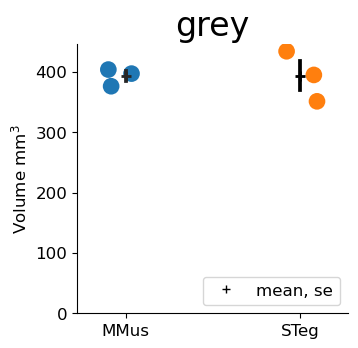

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


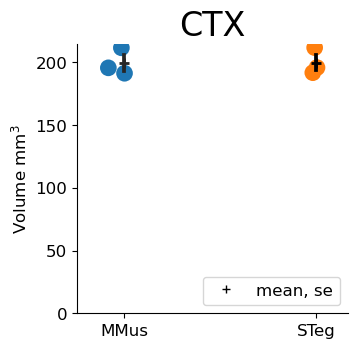

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


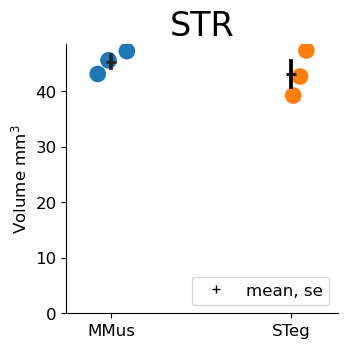

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


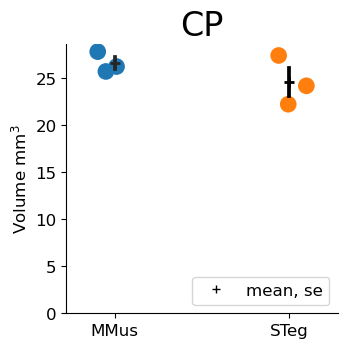

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


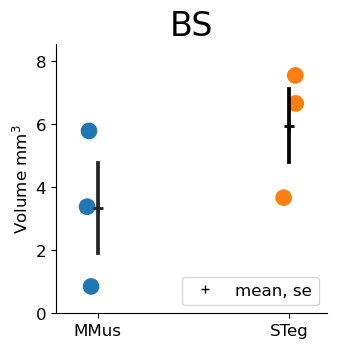

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


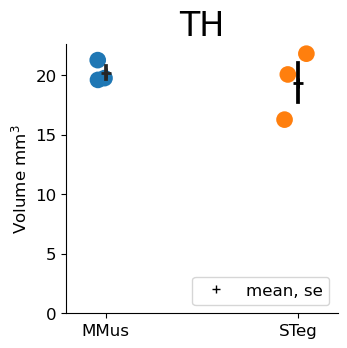

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


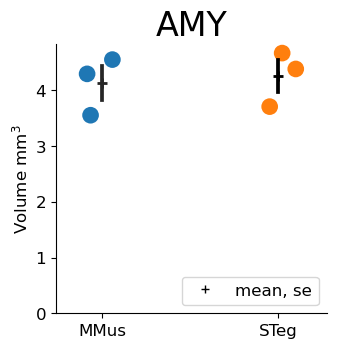

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


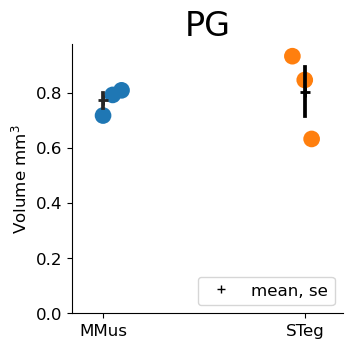

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


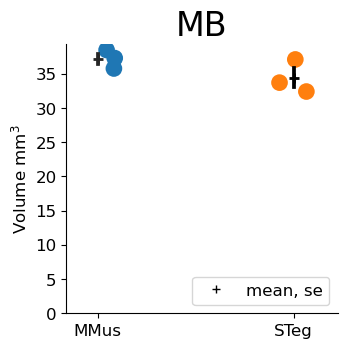

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


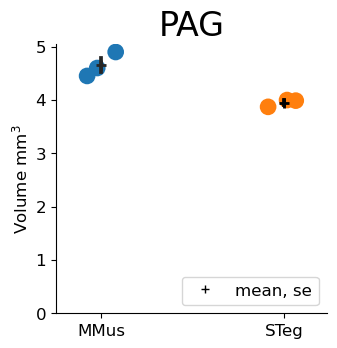

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


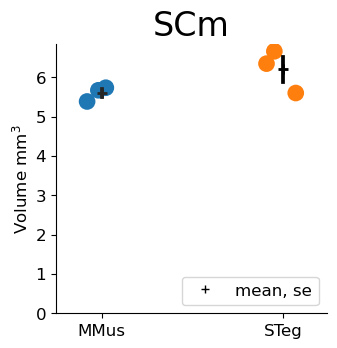

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


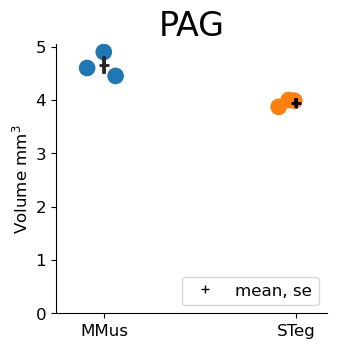

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


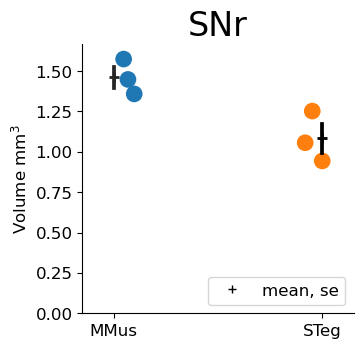

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


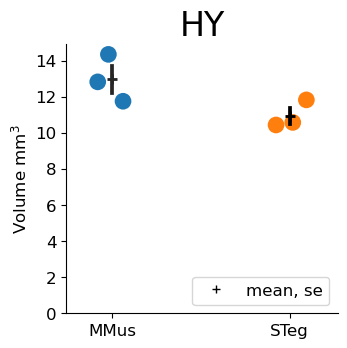

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


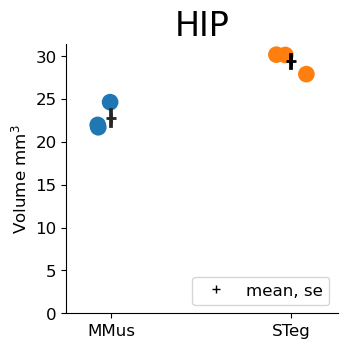

In [115]:
# fig, axs = plt.subplots(3,5, figsize=(5,15))

volumes_df = meta.copy()

# j=0
for area in areas:
    for i in range(meta.shape[0]):
        meta.loc[i,'brain']
        mask = all_masks[i]
        mask_sum = mask[area].sum()
        volume = mask_sum*voxel_size
        volumes_df.loc[i, area] = volume
    dot_plot_by_species(volumes_df, to_plot=area, ylabel="Volume $\mathregular{mm^3}$", 
                        title=area)
    # fig.add_subplot(j).set_ylim(0,500)
    # j+=1


    plt.savefig(out_path+area+"_volume_compare_"+title+".svg", dpi=300, bbox_inches="tight")
    plt.show()

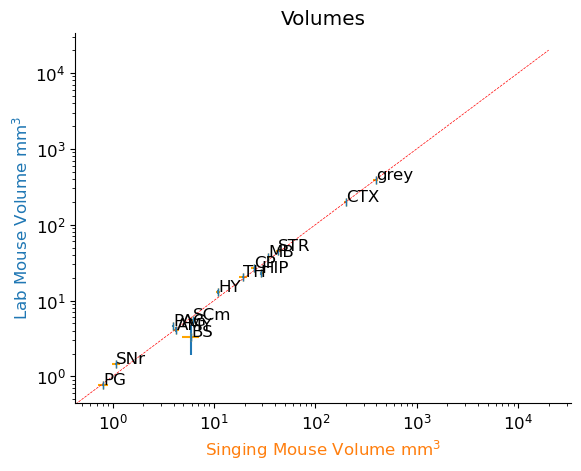

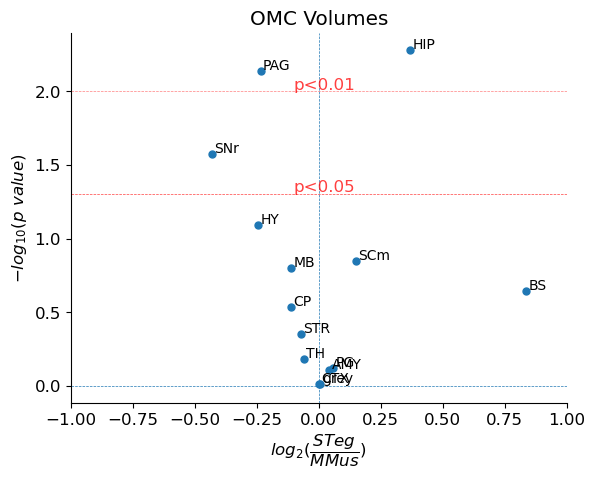

In [117]:
# scatterplot
scatter_df = volumes_df.copy()

scatter_df = volumes_df.melt(id_vars=['brain', 'species', 'inj_site'], value_vars=areas,
                             var_name="area", value_name="Volume")
scatter_df

stvmm_area_scatter(scatter_df, title="Volumes", to_plot="Volume",
                   xlabel="Singing Mouse Volume $\mathregular{mm^3}$",
                   ylabel="Lab Mouse Volume $\mathregular{mm^3}$")
plt.savefig(out_path+"volume_scatter_"+title+".svg", dpi=300, bbox_inches="tight")
plt.show()


# Volcano plot
ttest = df_ttest(scatter_df, test_vals="Volume")
volcano_plot(ttest, title="OMC Volumes")
plt.xlim(-1,1)
plt.savefig(out_path+"volume_volcano_"+title+".svg", dpi=300, bbox_inches="tight")
plt.show()

# Compare ALL brains
- include OMC and ACA brains

In [3]:
# # import all masks
meta = metadata.copy()
title = "ALL"

start = datetime.now()
# import masks for each brain in order of metadata
# create list of dictionaries containing masks
areas = ["grey", "CTX", "STR", "CP","BS", "TH", "AMY", "PG", "MB", "PAG", "SCm",
         "PAG", "SNr", "HY", "HIP"]

all_masks = []

for i in range(meta.shape[0]):
    brain = meta.loc[i, "brain"]
    print("\n","working on", brain)
    masks_folder = in_path+"masks/"+brain+"_masks/"

    masks = {}
    for area in areas:
        print("working on", area)
        with open(masks_folder+brain+"_"+area+".npy", "rb") as f:
            masks[area] = np.load(f)

    all_masks.append(masks)

print(datetime.now()-start)

len(all_masks)


 working on ACC_MMus_230403_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on ACC_MMus_230404_b2
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on ACC_MMus_230427_b3
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working on HIP

 working on ACC_STeg_230308_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on TH
working on AMY
working on PG
working on MB
working on PAG
working on SCm
working on PAG
working on SNr
working on HY
working

12

In [5]:
# fig, axs = plt.subplots(3,5, figsize=(5,15))
voxel_size = 0.05*0.02*0.02
volumes_df = meta.copy()

for area in areas:
    for i in range(meta.shape[0]):
        meta.loc[i,'brain']
        mask = all_masks[i]
        mask_sum = mask[area].sum()
        volume = mask_sum*voxel_size
        volumes_df.loc[i, area] = volume
    

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


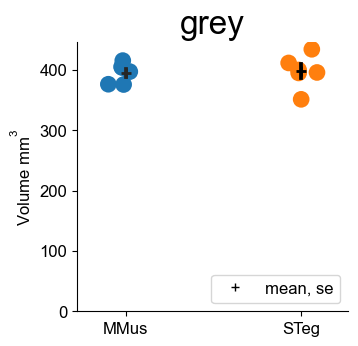

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


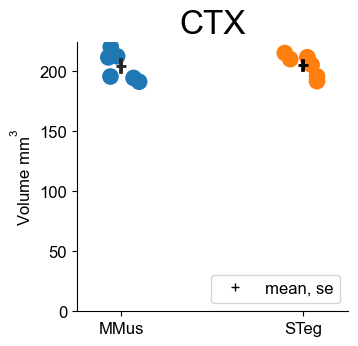

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


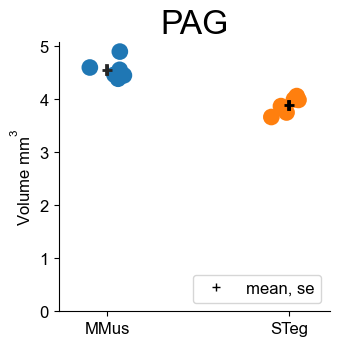

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


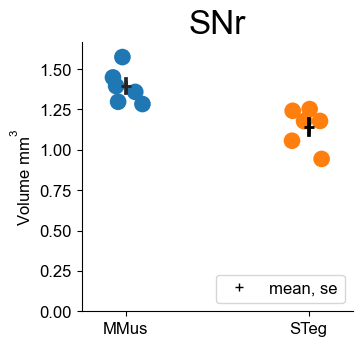

In [10]:
# plot dot plots for select areas
plot_areas = ["grey", "CTX", "PAG", "SNr"]
for area in plot_areas:
    dot_plot_by_species(volumes_df, to_plot=area, ylabel="Volume $\mathregular{mm^3}$", 
                        title=area)



    plt.savefig(out_path+area+"_volume_compare_"+title+".svg", dpi=300, bbox_inches="tight")
    plt.show()

In [8]:
# scatterplot
scatter_df = volumes_df.copy()

scatter_df = volumes_df.melt(id_vars=['brain', 'species', 'inj_site'], value_vars=areas,
                             var_name="area", value_name="Volume")
scatter_df


,brain,species,inj_site,area,Volume
0,ACC_MMus_230403_b1,MMus,ACC,grey,404.92986
1,ACC_MMus_230404_b2,MMus,ACC,grey,415.19512
2,ACC_MMus_230427_b3,MMus,ACC,grey,375.56098
3,ACC_STeg_230308_b1,STeg,ACC,grey,395.53538
4,ACC_STeg_230322_b2,STeg,ACC,grey,411.30118
...,...,...,...,...,...
163,OMC_MMus_220303_b1,MMus,OMC,HIP,24.62182
164,OMC_MMus_220324_b2,MMus,OMC,HIP,21.69304
165,OMC_STeg_220208_b0,STeg,OMC,HIP,30.12460
166,OMC_STeg_220411_b1,STeg,OMC,HIP,27.88936


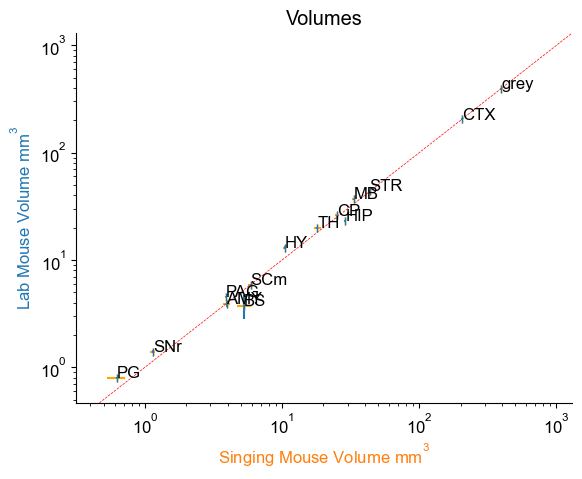

In [12]:
# scatter plot w/ error bars
stvmm_area_scatter(scatter_df, title="Volumes", to_plot="Volume",
                   xlabel="Singing Mouse Volume $\mathregular{mm^3}$",
                   ylabel="Lab Mouse Volume $\mathregular{mm^3}$")
plt.ylim(top=1300)
plt.xlim(right=1300)

# plt.savefig(out_path+"volume_scatter_"+title+".svg", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_98468/2043711173.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_means = scatter_df.groupby(["species", "area"]).mean()


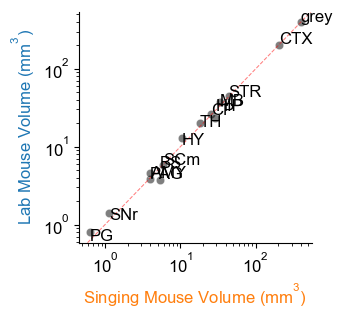

In [50]:
# Simpler Scatterplot
scatter_means = scatter_df.groupby(["species", "area"]).mean()
scatter_means = scatter_means.reset_index()

mm_means = scatter_means[scatter_means["species"]=="MMus"].reset_index(drop=True)
st_means = scatter_means[scatter_means["species"]=="STeg"].reset_index(drop=True)

simple_df = pd.DataFrame({"area":mm_means["area"], "mm_volumes":mm_means["Volume"], "st_volumes":st_means["Volume"]})

fig, axs = plt.subplots(figsize=(3,3))

sns.scatterplot(simple_df, x="st_volumes", y="mm_volumes", color="black", alpha=0.5)
for i in range(simple_df.shape[0]):
    plt.text(simple_df.loc[i,"st_volumes"], simple_df.loc[i,"st_volumes"], simple_df.loc[i,"area"])

plt.xscale("log")
plt.yscale("log")
plt.axline((1,1), (2,2), color="red", linestyle="--", alpha=0.5, linewidth=0.75)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Singing Mouse Volume ($\mathregular{mm^3}$)", color="tab:orange")
plt.ylabel("Lab Mouse Volume ($\mathregular{mm^3}$)", color="tab:blue")

plt.savefig(out_path+"volume_scatter_"+title+"_simple.svg", dpi=300, bbox_inches="tight")

plt.show()


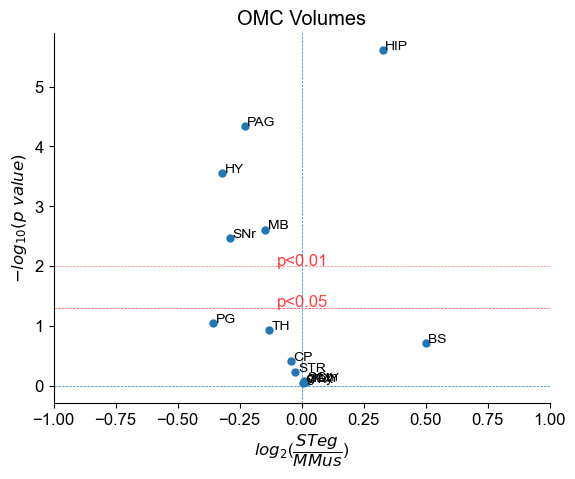

In [51]:


# Volcano plot
ttest = df_ttest(scatter_df, test_vals="Volume")
volcano_plot(ttest, title="OMC Volumes")
plt.xlim(-1,1)
plt.savefig(out_path+"volume_volcano_"+title+".svg", dpi=300, bbox_inches="tight")
plt.show()